In [1]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import numpy as np


houses_train = pd.read_csv('train.csv')
houses_train = pd.get_dummies(houses_train, drop_first=True).dropna(axis=1)
houses_train
k = 100
selector = SelectKBest(mutual_info_classif, k=k)
Y = houses_train['SalePrice']
X = houses_train.drop(['SalePrice'], axis=1)
fit = selector.fit_transform(X, Y)
cols_idxs = selector.get_support(indices=True)
features_df_new = houses_train.iloc[:,cols_idxs]
print(features_df_new.columns.values)
indices = np.argsort(selector.scores_)[::-1]
features = []
for i in range(k):
    features.append(houses_train.columns[indices[i]])
print(features)


['Id' 'MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF'
 '2ndFlrSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'MoSold' 'YrSold'
 'MSZoning_RH' 'MSZoning_RL' 'MSZoning_RM' 'LotShape_IR3'
 'LandContour_Low' 'LotConfig_FR3' 'Neighborhood_ClearCr'
 'Neighborhood_Edwards' 'Neighborhood_Mitchel' 'Neighborhood_NPkVill'
 'Neighborhood_OldTown' 'Condition1_Feedr' 'Condition1_Norm'
 'Condition1_PosA' 'Condition1_RRNn' 'Condition2_Feedr'
 'HouseStyle_1.5Unf' 'HouseStyle_1Story' 'HouseStyle_2.5Fin'
 'HouseStyle_2.5Unf' 'HouseStyle_SLvl' 'RoofStyle_Gambrel' 'RoofStyle_Hip'
 'RoofStyle_Shed' 'Exterior1st_CemntBd' 'Exterior1st_MetalSd'
 'Exterior1st_Stucco' 'Exterior1st_VinylSd' 'Exterior1st_WdShing'
 'Exterior2nd_CmentBd' 'Exterior2nd_Stucco' 'Exterior2nd_VinylSd'
 'Exterior2nd_Wd Shng' 'E

64


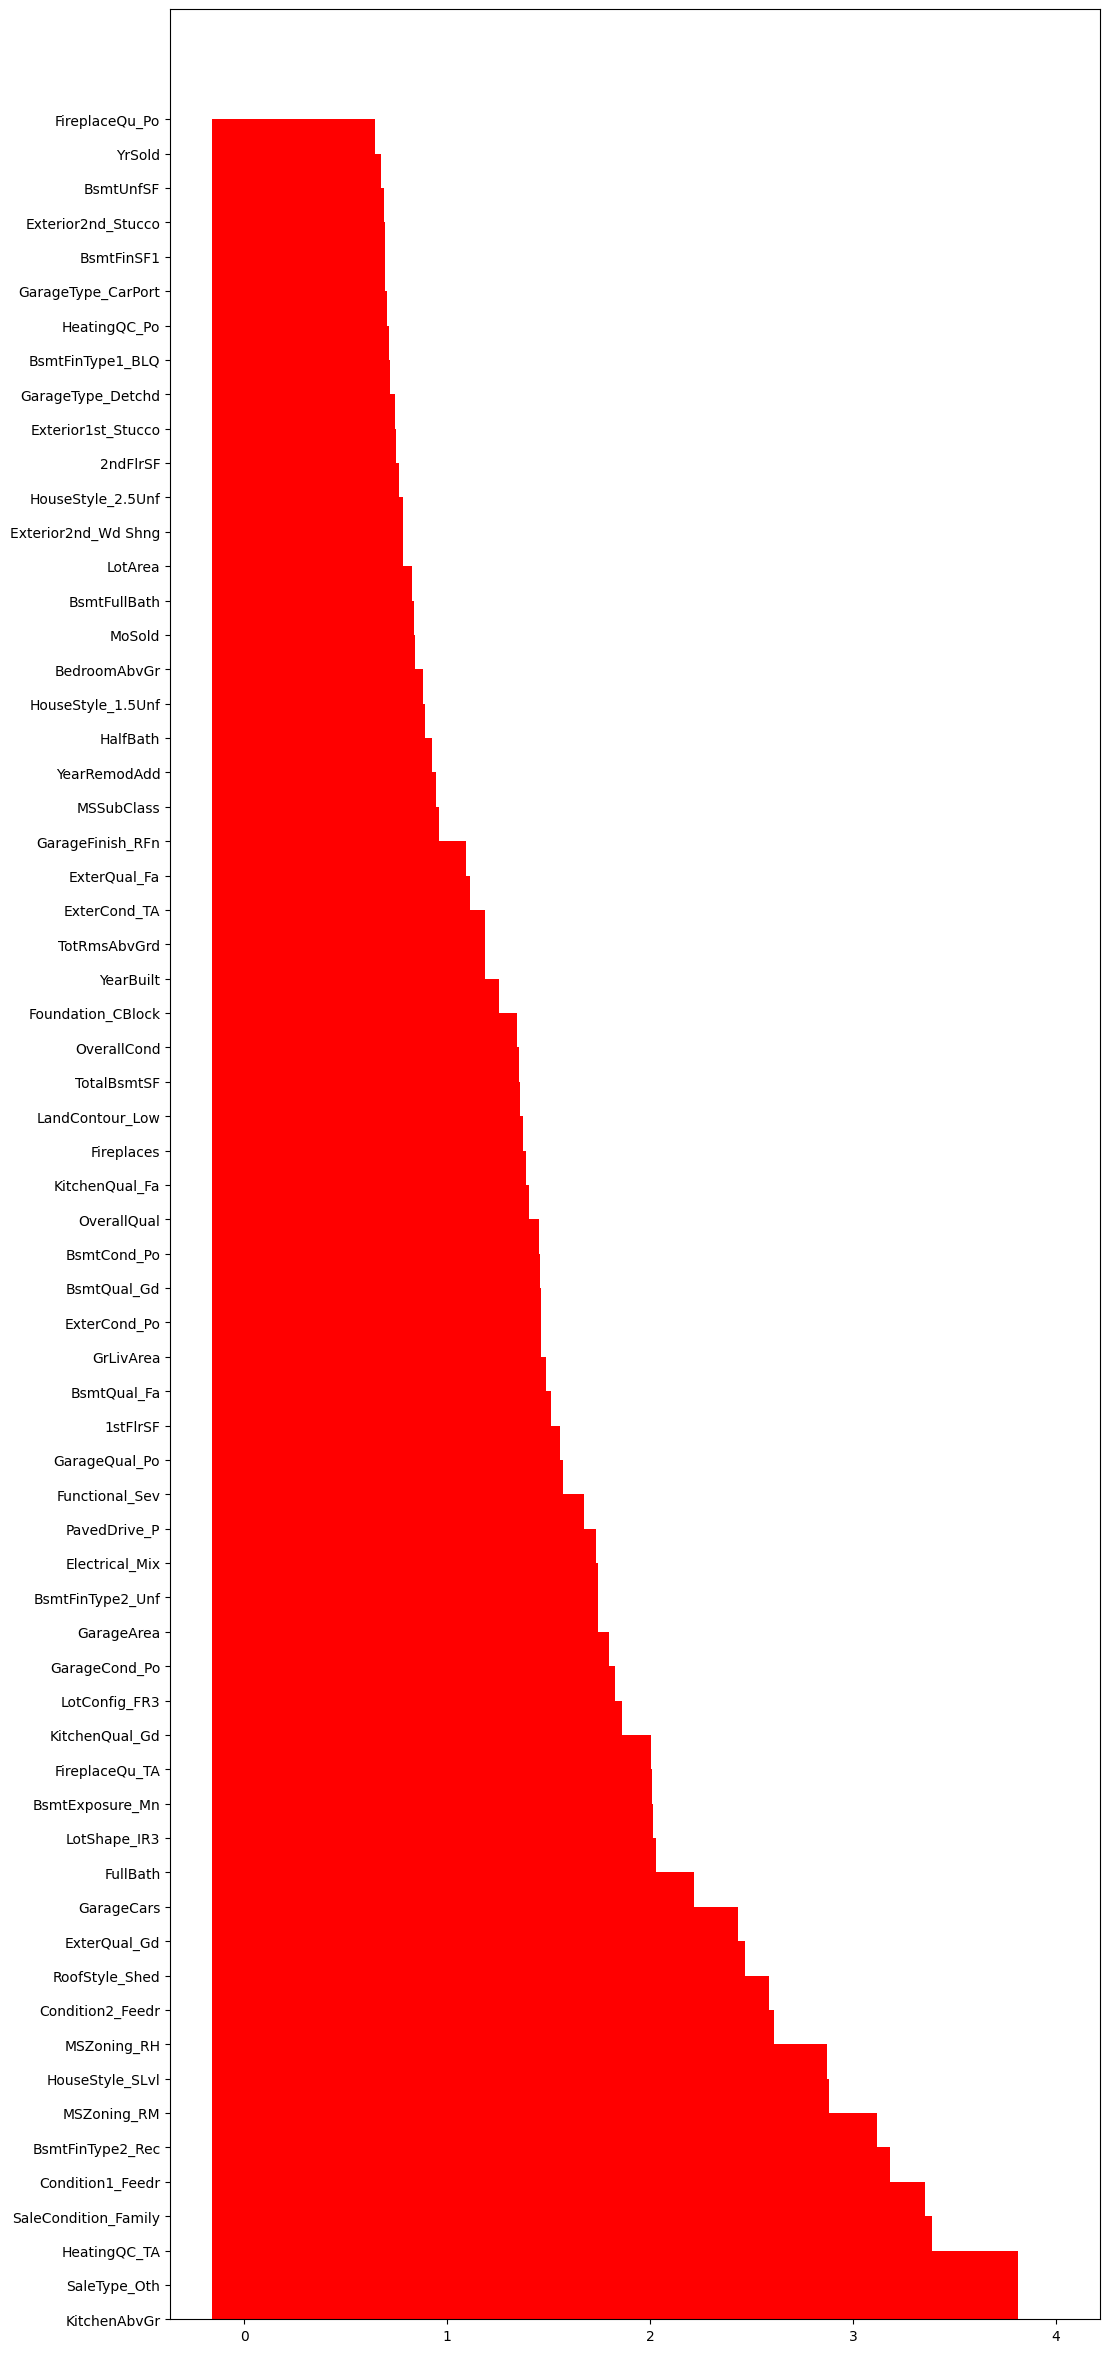

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,30))
plt.bar(selector.scores_[indices[range(k)]], features, color='r', align='center')
# plt.xticks(rotation=)
plt.show()